In [10]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st
from datetime import datetime
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import plotly.figure_factory as ff

In [3]:
pip install numpy plotly streamlit datetime


Note: you may need to restart the kernel to use updated packages.


In [4]:
df_agg = pd.read_csv('Aggregated_Metrics_By_Video.csv').iloc[1:,:]
df_agg_sub = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df_comments = pd.read_csv('Aggregated_Metrics_By_Video.csv')
df_time = pd.read_csv('Video_Performance_Over_Time.csv')
#integer location 

In [5]:
def load_data():
    df_agg = pd.read_csv('/home/shibil/Annual report/Streamlit/Aggregated_Metrics_By_Video.csv').iloc[1:,:]
    df_agg_sub = pd.read_csv('/home/shibil/Annual report/Streamlit/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
    df_comments = pd.read_csv('/home/shibil/Annual report/Streamlit/Aggregated_Metrics_By_Video.csv')
    df_all_comments = pd.read_csv('/home/shibil/Annual report/Streamlit/All_Comments_Final.csv')
    df_time = pd.read_csv('/home/shibil/Annual report/Streamlit/Video_Performance_Over_Time.csv')

   

#integer location 

    df_agg.columns = ['Video','Video title','Video publish time','Comments added','Shares','Dislikes','Likes',
                      'Subscribers lost','Subscribers gained','RPM(USD)','CPM(USD)','Average % viewed','Average view duration',
                      'Views','Watch time (hours)','Subscribers','Your estimated revenue (USD)','Impressions','Impressions ctr(%)']
    
    df_all_comments.rename(columns={'VidId': 'Video', 'Comments': 'comment_text'}, inplace=True)

#rename coloums df_agg['Video publish time'] = pd.to_datetime(df_agg['Video publish time'], format="%b %d, %Y")

    df_agg['Video publish time'] = pd.to_datetime(df_agg['Video publish time'], format="%b %d, %Y")
#print(df_agg['Video publish time'])


    df_agg['Average view duration in seconds'] = df_agg['Average view duration'].apply(str_to_seconds)

#print(df_agg['Average view duration in seconds'])

    df_agg['Engagement_ratio'] =  (df_agg['Comments added'] + df_agg['Shares'] +df_agg['Dislikes'] + df_agg['Likes']) /df_agg.Views
#print(df_agg['Engagement_ratio'] )

    df_agg['Views / sub gained'] = df_agg['Views'] / df_agg['Subscribers gained']
#print(df_agg['Views / sub gained'])

    df_agg['Video publish time']=pd.to_datetime(df_agg['Video publish time'])
    df_agg['Video publish time'].dtype

# Convert the 'Average view duration' column to datetime format
    df_agg['Average view duration'] = df_agg['Average view duration'].astype(str).apply(lambda x: datetime.strptime(x, '%H:%M:%S') if x != 'nan' else x)

# Convert the datetime objects into duration in seconds
    df_agg['Avg_duration_sec'] = df_agg['Average view duration'].apply(lambda x: x.second + x.minute * 60 + x.hour * 3600 if x != 'nan' else 0)

#print(df_agg['Avg_duration_sec'])


    df_time['Date'] = pd.to_datetime(df_time['Date'], errors='coerce')
    return df_agg, df_agg_sub, df_comments, df_time,df_all_comments


In [6]:
img_name = [
    "https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg",
    "https://i.ytimg.com/vi/Ip50cXvpWY4/hqdefault.jpg",
    "https://i.ytimg.com/vi/8igH8qZafpo/hqdefault.jpg",
    "https://i.ytimg.com/vi/I3FBJdiExcg/hqdefault.jpg",
    "https://i.ytimg.com/vi/yukdXV9LR48/hqdefault.jpg",
    "https://i.ytimg.com/vi/41Clrh6nv1s/hqdefault.jpg",
    "https://i.ytimg.com/vi/sHRq-LshG3U/hqdefault.jpg",
    "https://i.ytimg.com/vi/MpF9HENQjDo/hqdefault.jpg",
    "https://i.ytimg.com/vi/SVtRsDhHlDk/hqdefault.jpg",
    "https://i.ytimg.com/vi/m5pwx3hgtzM/hqdefault.jpg"
]

# Grouping and creating the thumbnail_df
thumbnail_df = df_agg_sub.groupby(['Thumbnail link', 'Video Title', 'Video Length']).agg({
    'Views': 'sum',
    'Video Likes Added': 'sum',
    'Video Dislikes Added': 'sum',
    'Average View Percentage': 'mean',
    'Average Watch Time': 'mean',
    'User Comments Added': 'sum'
}).reset_index()

# Sorting and taking the top 10 based on views
thumbnail_df = thumbnail_df.sort_values(by='Views', ascending=False).head(10)

# Adding the img_name to the dataframe and computing the ratio
thumbnail_df['img'] = img_name
thumbnail_df['ratio'] = (thumbnail_df['Video Likes Added'] - thumbnail_df['Video Dislikes Added']) / (thumbnail_df['Video Likes Added'] + thumbnail_df['Video Dislikes Added'])
thumbnail_df['ratio'] = thumbnail_df['ratio'] * 100  # Convert to percentage

# Format video length in minutes and seconds
thumbnail_df['Video Length'] = thumbnail_df['Video Length'] // 60 + (thumbnail_df['Video Length'] % 60) / 100

# Format average watch time in minutes and seconds
thumbnail_df['Average Watch Time'] = thumbnail_df['Average Watch Time'] // 60 + (thumbnail_df['Average Watch Time'] % 60) / 100

# Compute average watch time ratio
thumbnail_df['avg_wt_ratio'] = (thumbnail_df['Average Watch Time'] / thumbnail_df['Video Length']) * 100


In [8]:
print(thumbnail_df.head())


                                       Thumbnail link  \
27   https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg   
77   https://i.ytimg.com/vi/Ip50cXvpWY4/hqdefault.jpg   
47   https://i.ytimg.com/vi/8igH8qZafpo/hqdefault.jpg   
73   https://i.ytimg.com/vi/I3FBJdiExcg/hqdefault.jpg   
219  https://i.ytimg.com/vi/yukdXV9LR48/hqdefault.jpg   

                                           Video Title  Video Length    Views  \
27   How I Would Learn Data Science (If I Had to St...          8.36  1252970   
77   The Best Free Data Science Courses Nobody is T...          6.15   297050   
47   3 Proven Data Science Projects for Beginners (...          7.34   237192   
73   Beginner Kaggle Data Science Project Walk-Thro...         38.16   167881   
219  The Projects You Should Do To Get A Data Scien...         12.50   131573   

     Video Likes Added  Video Dislikes Added  Average View Percentage  \
27               49000                  1332                 0.345762   
77               20293  

In [7]:
print(df_agg.columns)



Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')


In [11]:
fig = ff.create_table(thumbnail_df)
st.plotly_chart(fig)


2023-09-10 21:42:51.154 
  command:

    streamlit run /home/shibil/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [46]:
df_agg.columns = ['Video', 'Video title', 'Video publish time', 'Comments added', 'Shares', 'Dislikes', 'Likes', 
                  'Subscribers lost', 'Subscribers gained', 'RPM(USD)', 'CPM(USD)', 'Average % viewed', 
                  'Average view duration', 'Views', 'Watch time (hours)', 'Subscribers', 
                  'Your estimated revenue (USD)', 'Impressions', 'Impressions ctr(%)', 
                  'Average view duration in seconds', 'Engagement_ratio', 'Views / sub gained', 'Avg_duration_sec']


In [47]:
df_agg['Video publish time'] = pd.to_datetime(df_agg['Video publish time'], format="%b %d, %Y")
print(df_agg['Video publish time'])


111   2022-01-17
187   2022-01-14
64    2022-01-10
59    2022-01-03
32    2021-12-27
         ...    
75    2018-11-14
190   2018-11-12
204   2018-07-10
138   2017-11-18
223   2017-06-06
Name: Video publish time, Length: 223, dtype: datetime64[ns]


In [50]:
def str_to_seconds(time_str):
    if not isinstance(time_str, str):  # check if not string
        time_str = str(time_str)
    if "1900-01-01" in time_str:  # check for the presence of a date
        h, m, s = map(int, time_str.split()[-1].split(':'))
    else:
        h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df_agg['Average view duration in seconds'] = df_agg['Average view duration'].apply(str_to_seconds)

print(df_agg['Average view duration in seconds'])



111    158
187     38
64     280
59     166
32     269
      ... 
75     152
190    237
204    145
138    105
223     64
Name: Average view duration in seconds, Length: 223, dtype: int64


In [51]:
df_agg['Engagement_ratio'] =  (df_agg['Comments added'] + df_agg['Shares'] +df_agg['Dislikes'] + df_agg['Likes']) /df_agg.Views
print(df_agg['Engagement_ratio'] )

111    0.080995
187    0.039567
64     0.090493
59     0.059705
32     0.067379
         ...   
75     0.020716
190    0.039166
204    0.031036
138    0.024580
223    0.050000
Name: Engagement_ratio, Length: 223, dtype: float64


In [52]:
df_agg['Views / sub gained'] = df_agg['Views'] / df_agg['Subscribers gained']
print(df_agg['Views / sub gained'])

111     243.500000
187    2401.000000
64       75.566176
59      151.384615
32       31.054837
          ...     
75      228.246914
190      68.086420
204     201.852941
138     149.171171
223            inf
Name: Views / sub gained, Length: 223, dtype: float64


In [53]:
df_agg.sort_values('Video publish time', ascending = False, inplace = True) 
df_agg['Video publish time']=pd.to_datetime(df_agg['Video publish time'])
df_agg['Video publish time'].dtype


dtype('<M8[ns]')

In [55]:
from datetime import datetime

# Convert the 'Average view duration' column to datetime format
df_agg['Average view duration'] = df_agg['Average view duration'].astype(str).apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') if x != 'nan' else x
)

# Convert the datetime objects into duration in seconds
df_agg['Avg_duration_sec'] = df_agg['Average view duration'].apply(
    lambda x: x.second + x.minute * 60 + x.hour * 3600 if x != 'nan' else 0
)

print(df_agg['Avg_duration_sec'])


111    158
187     38
64     280
59     166
32     269
      ... 
75     152
190    237
204    145
138    105
223     64
Name: Avg_duration_sec, Length: 223, dtype: int64


In [56]:
df_time['Date'] = pd.to_datetime(df_time['Date'], errors='coerce')
print(df_time['Date'])



0        2022-01-19
1        2022-01-19
2        2022-01-19
3        2022-01-19
4        2022-01-19
            ...    
111852   2017-11-21
111853   2017-11-20
111854   2017-11-19
111855   2017-11-18
111856   2017-11-01
Name: Date, Length: 111857, dtype: datetime64[ns]


In [57]:
print(df_agg.dtypes)

Video                                       object
Video title                                 object
Video publish time                  datetime64[ns]
Comments added                               int64
Shares                                       int64
Dislikes                                     int64
Likes                                        int64
Subscribers lost                             int64
Subscribers gained                           int64
RPM(USD)                                   float64
CPM(USD)                                   float64
Average % viewed                           float64
Average view duration               datetime64[ns]
Views                                        int64
Watch time (hours)                         float64
Subscribers                                  int64
Your estimated revenue (USD)               float64
Impressions                                  int64
Impressions ctr(%)                         float64
Average view duration in second

In [58]:
df_agg_diff = df_agg.copy()
metric_date_12mo = df_agg_diff['Video publish time'].max() - pd.DateOffset(months=12)

# Filter to rows based on 'Video publish time' condition
filtered_df = df_agg_diff[df_agg_diff['Video publish time'] >= metric_date_12mo]

# Only include numeric columns
numeric_cols = filtered_df.select_dtypes(include=[np.number])

# Calculate the median
median_agg = numeric_cols.median(numeric_only=True)

print(numeric_cols )
print(filtered_df)

     Comments added  Shares  Dislikes  Likes  Subscribers lost  \
111              37      43         8    267                14   
187              12       2         3     78                 1   
64               62     141         5    722                28   
59               65      36        12    592                10   
32              109     767        53   4413                46   
132              29      39         6    237                20   
191              10      20         5    212                 0   
62               62     309         4    869                16   
61               63     174         9    786                16   
24              148     408        56   2378                34   
73               56      60         1    343                17   
147              25      34         1    189                11   
157              22      49         2    191                 9   
118              35      19         1    219                 8   
133       

In [59]:
print (median_agg)

Comments added                          43.500000
Shares                                  42.500000
Dislikes                                 5.000000
Likes                                  382.500000
Subscribers lost                        13.000000
Subscribers gained                      56.500000
RPM(USD)                                 4.370000
CPM(USD)                                10.573000
Average % viewed                        41.175000
Views                                 7417.000000
Watch time (hours)                     279.985100
Subscribers                             38.500000
Your estimated revenue (USD)            24.799500
Impressions                         155102.500000
Impressions ctr(%)                       2.430000
Average view duration in seconds       166.000000
Engagement_ratio                         0.060285
Views / sub gained                     140.146406
Avg_duration_sec                       166.000000
dtype: float64


In [60]:
print(metric_date_12mo)

2021-01-17 00:00:00


In [61]:
numeric_cols = np.array((df_agg_diff.dtypes == 'float64') | (df_agg_diff.dtypes == 'int64'))
df_agg_diff.iloc[:,numeric_cols] = (df_agg_diff.iloc[:,numeric_cols] - median_agg).div(median_agg)


In [62]:
df_time_diff = pd.merge(df_time, df_agg.loc[:,['Video','Video publish time']], left_on ='External Video ID', right_on = 'Video')
df_time_diff['days_published'] = (df_time_diff['Date'] - df_time_diff['Video publish time']).dt.days

In [63]:
date_12mo = df_agg['Video publish time'].max() - pd.DateOffset(months =12)
df_time_diff_yr = df_time_diff[df_time_diff['Video publish time'] >= date_12mo]

In [64]:
views_days = pd.pivot_table(df_time_diff_yr,index= 'days_published',values ='Views', aggfunc = [np.mean,np.median,lambda x: np.percentile(x, 80),lambda x: np.percentile(x, 20)]).reset_index()
views_days.columns = ['days_published','mean_views','median_views','80pct_views','20pct_views']
views_days = views_days[views_days['days_published'].between(0,30)]
views_cumulative = views_days.loc[:,['days_published','median_views','80pct_views','20pct_views']] 
views_cumulative.loc[:,['median_views','80pct_views','20pct_views']] = views_cumulative.loc[:,['median_views','80pct_views','20pct_views']].cumsum()


In [65]:
print(df_agg_diff['Video publish time'].apply(type).value_counts())


Video publish time
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    223
Name: count, dtype: int64


In [66]:
print(df_agg_diff.columns)


Index(['Video', 'Video title', 'Video publish time', 'Comments added',
       'Shares', 'Dislikes', 'Likes', 'Subscribers lost', 'Subscribers gained',
       'RPM(USD)', 'CPM(USD)', 'Average % viewed', 'Average view duration',
       'Views', 'Watch time (hours)', 'Subscribers',
       'Your estimated revenue (USD)', 'Impressions', 'Impressions ctr(%)',
       'Average view duration in seconds', 'Engagement_ratio',
       'Views / sub gained', 'Avg_duration_sec'],
      dtype='object')


In [67]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Hour of Day', ylabel='Day of Week'>

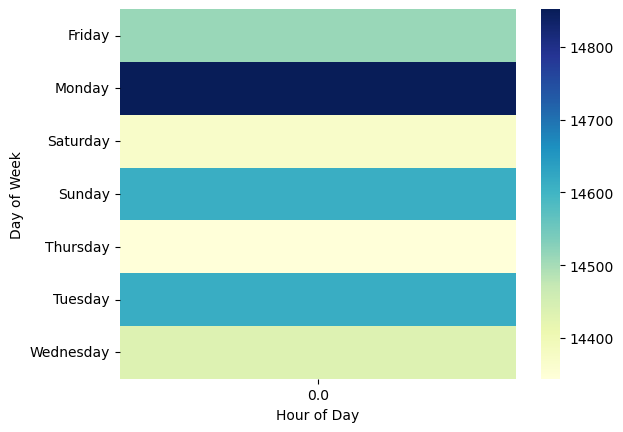

In [68]:
# Assuming df_time has a 'Date' column
df_time['Day of Week'] = df_time['Date'].dt.day_name()
df_time['Hour of Day'] = df_time['Date'].dt.hour
heatmap_data = df_time.groupby(['Day of Week', 'Hour of Day']).size().unstack()

# Using Seaborn for the heatmap
import seaborn as sns
sns.heatmap(heatmap_data, cmap='YlGnBu')


In [69]:
# Assuming df_time has 'Video Title' as a column
#import matplotlib.pyplot as plt

#unique_videos = df_time['Video Title'].unique()

#for video in unique_videos:
    #st.write(f"Heatmap for video: {video}")
    #video_data = df_time[df_time['Video Title'] == video]
    
    #video_data['Day of Week'] = video_data['Date'].dt.day_name()
    #video_data['Hour of Day'] = video_data['Date'].dt.hour
    #heatmap_data_video = video_data.groupby(['Day of Week', 'Hour of Day']).size().unstack()
    
    # Using Seaborn for the heatmap
    #plt.figure(figsize=(10, 7))
    #sns.heatmap(heatmap_data_video, cmap='YlGnBu', annot=True, fmt='d')
    #st.pyplot()


In [71]:
print(df_comments.columns)


Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')


In [76]:
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import matplotlib.pyplot as plt

# Using 'Com­ments ad­ded' as the source for comments
comments = df_comments['Com­ments ad­ded'].tolist()

def color_func(word, *args, **kwargs):
    sentiment = TextBlob(word).sentiment.polarity
    if sentiment > 0:
        return "green"
    elif sentiment < 0:
        return "red"
    else:
        return "blue"

def generate_sentiment_wordcloud(comments):
    text = ' '.join([str(comment) for comment in comments])  # Ensuring each comment is converted to string
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", color_func=color_func).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_sentiment_wordcloud(comments)


ValueError: We need at least 1 word to plot a word cloud, got 0.